<a href="https://colab.research.google.com/github/jmren168/PdM/blob/master/NRF07_ImbalancedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install git+https://github.com/scikit-learn-contrib/imbalanced-learn.git
import imblearn

  Cloning https://github.com/scikit-learn-contrib/imbalanced-learn.git to /tmp/pip-req-build-y062b1gs
  Running command git clone -q https://github.com/scikit-learn-contrib/imbalanced-learn.git /tmp/pip-req-build-y062b1gs
  Stored in directory: /tmp/pip-ephem-wheel-cache-ovo_s74b/wheels/6c/07/cf/38cb9b7cc9e6a0ac7648a80ec192b6f2d863405fb0049ac0ff
Successfully built imbalanced-learn
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


In [0]:
# download dataset
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1hpCceb4EOt6Exh5LYJqlPWJocUHyI0Bg" -O data.npz  
import numpy as np

data = np.load('data.npz')
X,y = data['data'],data['label']

--2019-06-02 10:03:57--  https://drive.google.com/uc?export=download&id=1hpCceb4EOt6Exh5LYJqlPWJocUHyI0Bg
Resolving drive.google.com (drive.google.com)... 74.125.195.102, 74.125.195.138, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mu88i469p0ot3d9snsos21ahrbm3ac75/1559469600000/01426934028188100870/*/1hpCceb4EOt6Exh5LYJqlPWJocUHyI0Bg?e=download [following]
--2019-06-02 10:03:58--  https://doc-00-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mu88i469p0ot3d9snsos21ahrbm3ac75/1559469600000/01426934028188100870/*/1hpCceb4EOt6Exh5LYJqlPWJocUHyI0Bg?e=download
Resolving doc-00-48-docs.googleusercontent.com (doc-00-48-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-00-48-docs.googleusercontent.com (doc-00-

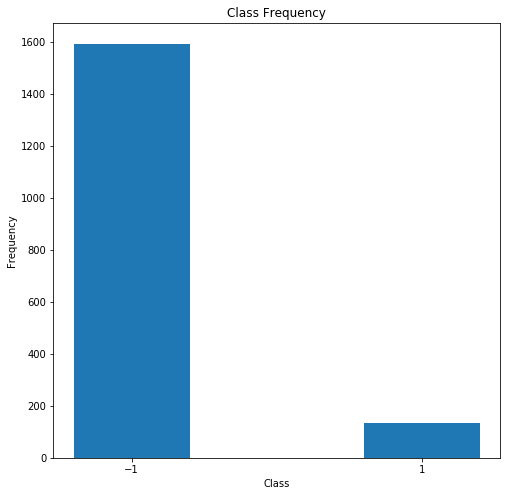

In [0]:
# plot data distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
unique, counts = np.unique(y, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xticks([-1,1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Use SVM as a classifier to evaluate the performance on imbalanced dataset

In [0]:
from sklearn.svm import SVC # SVM for classification
from sklearn.model_selection import train_test_split # split訓練及測試資料

# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0) # 依2:1隨機切割出training set and test set

# fit data
clf = SVC(C=1.0, kernel='rbf') # C: 分錯類別的penalty; kernel: 轉換空間
clf.fit(X_train, y_train)

# outside prediction
y_pred_test = clf.predict(X_test)

# inside prediction
y_pred_train = clf.predict(X_train)

# calculate performance
acc_outside = sum((y_test - y_pred_test)==0) / len(y_test) * 100
acc_inside = sum((y_train - y_pred_train)==0) / len(y_train) * 100

print('SVM')
print("inside accuracy: {:.2f}%".format(acc_inside))
print("outside accuracy: {:.2f}%".format(acc_outside))

SVM
inside accuracy: 95.23%
outside accuracy: 94.27%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Is **HIGH** accuracy always good?

# Let's see the confusion matrix of prediction result

Confusion matrix:
 [[529   0]
 [ 33  14]]


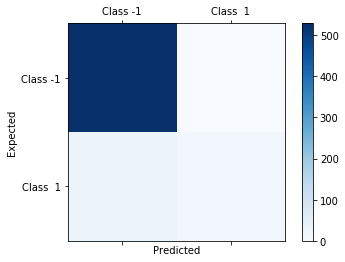

In [0]:
# ref: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

# show confusion matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
print('Confusion matrix:\n', conf_mat)
labels = ['Class -1', 'Class  1']


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Re-sampling
![替代文字](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

ref: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

#Oversampling Minority Class

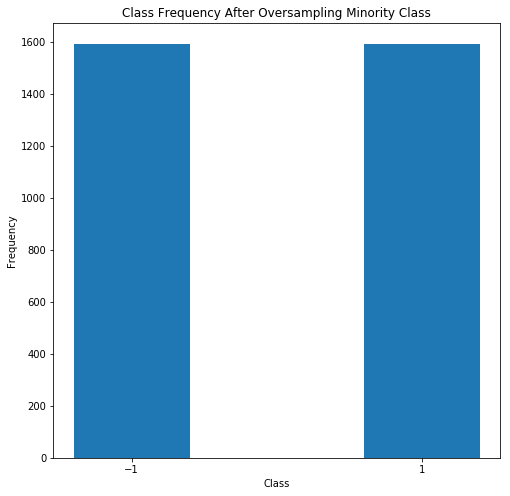

In [0]:
from imblearn.over_sampling import RandomOverSampler

clf = RandomOverSampler(random_state=0)
X_res, y_res = clf.fit_resample(X,y)

plt.figure(figsize=(8,8))
unique, counts = np.unique(y_res, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency After Oversampling Minority Class')
plt.xticks([-1,1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# We train SVM on the sampled dataset, and then use it to evaluate the original test set

In [0]:
from sklearn.svm import SVC # SVM for classification
from sklearn.model_selection import train_test_split # split訓練及測試資料

# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0) # 依2:1隨機切割出training set and test set

# balanced training dataset
ROS = RandomOverSampler(random_state=0)
X_train_res, y_train_res = ROS.fit_resample(X_train,y_train)

# fit data
SVM = SVC(C=1.0, kernel='rbf') # C: 分錯類別的penalty; kernel: 轉換空間
SVM.fit(X_train_res, y_train_res)

# outside prediction
y_pred_test = SVM.predict(X_test)

# inside prediction
y_pred_train_res = SVM.predict(X_train_res)

# calculate performance
acc_outside = sum((y_test - y_pred_test)==0) / len(y_test) * 100
acc_inside = sum((y_train_res - y_pred_train_res)==0) / len(y_train_res) * 100

print('SVM')
print("inside accuracy: {:.2f}%".format(acc_inside))
print("outside accuracy: {:.2f}%".format(acc_outside))

SVM
inside accuracy: 97.28%
outside accuracy: 94.44%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#Show the confusion matrix again

Confusion matrix:
 [[497  32]
 [  0  47]]


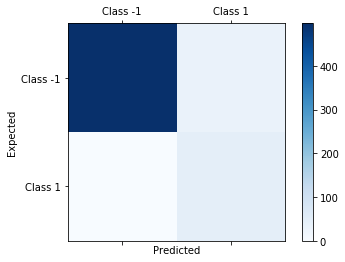

In [0]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
print('Confusion matrix:\n', conf_mat)

labels = ['Class -1', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Model-Level Imbalanced Data Processing: use SVM as an example

In [0]:
from sklearn.svm import SVC # SVM for classification
from sklearn.model_selection import train_test_split # split訓練及測試資料

# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0) # 依2:1隨機切割出training set and test set

# fit data
SVM = SVC(C=1.0, kernel='rbf', class_weight='balanced') # C: 分錯類別的penalty; kernel: 轉換空間
SVM.fit(X_train, y_train)

# outside prediction
y_pred_test = SVM.predict(X_test)

# inside prediction
y_pred_train = SVM.predict(X_train)

# calculate performance
acc_outside = sum((y_test - y_pred_test)==0) / len(y_test) * 100
acc_inside = sum((y_train - y_pred_train)==0) / len(y_train) * 100

print('SVM')
print("inside accuracy: {:.2f}%".format(acc_inside))
print("outside accuracy: {:.2f}%".format(acc_outside))




SVM
inside accuracy: 93.23%
outside accuracy: 93.06%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#Show the confusion matrix of model-level imbalanced data processing

Confusion matrix:
 [[489  40]
 [  0  47]]


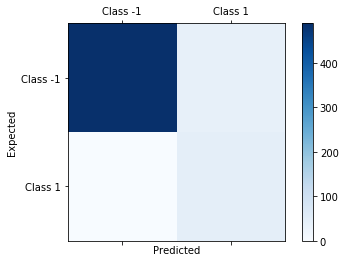

In [0]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
print('Confusion matrix:\n', conf_mat)

labels = ['Class -1', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()